# Логика

## У вас есть два шарика, которые разбиваются при падении с одной и той же высоты и здание из 100 этажей. Вы можете подниматься на любой этаж и бросать с него один из шариков.
## За какое минимальное количество бросков шариков можно выяснить наименьший номер этажа, при падении с которого шарики разбиваются?

Начнем с того, что максимальное количество для того, чтобы определить минимальный этаж 14 бросков.
Первый шар можно бросать по формуле :

```x + (x-1) + (x-2) + (x-3)... + (x-n) = кол-во этажей```

Преобразуем левую часть в

```x(x+1)/2``` 

получим, что

```x(x+1)/2 = 100```

Тогда x = 14.
Логика бросков 1 шара следующая 14 27 39 50 60 69 77 84 90 95 99 100.
Если он разбился на любом из этих этажей, то начинаем бросать его с этаже, который выше на 1, чем предыдущий с которого бросали.

# Математика + программирование

## Дана кусочно-постоянная функция F: 
## Напишите на любом ЯП (предпочтительно Python 3) программу, которая принимает на вход массив A пар (x, y) длины n, и возвращает кортеж из трех элементов (a, b, c), соответствующих параметрам функции F, при которых среднеквадратическое отклонение функции от точек из A минимально.
## Визуализация решения приветствуется.

Решать будем при помощи дерева решения ```scikit-learn```, в качестве меры точности будем использовать ```MSE```. Данные будем генерировать при помощи синусоиды (фнукция ```num_points```). Данные будут выглядить как на картинке (ТУТ КАРТИНКА)


In [36]:
import numpy as np

def num_points(points:int = 100):
    x = np.linspace(0, 4, points)
    y = np.sin(x)
    return x.reshape(-1,1), y

In [37]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
def solve_task(x: np.ndarray, y: np.ndarray) -> tuple:
    # создание экземпляра DecisionTreeRegressor
    # tree_regression - решающее дерево для задачи регрессии
    # max_depth - максимальная глубина дерева
    # max_leaf_nodes - максимальное количество листьев дерева
    # criterion - критерий для измерения качества разбиения
    tree_regression = DecisionTreeRegressor(
        max_depth=1,
        max_leaf_nodes=2,
        criterion='squared_error')

    # обучение модели на предоставленных данных
    tree_regression.fit(x, y)

    # создание тестовых данных для визуализации дерева и получения уравнения линейной функции
    x_test = np.arange(0.0, 5.0, 0.1).reshape(-1,1)
    y_1 = tree_regression.predict(x_test)

    # получение текстовой репрезентации дерева
    text_representation = tree.export_text(
        tree_regression, feature_names=['x'])
    print(text_representation)

    # визуализация данных и модели
    plt.figure()
    plt.scatter(x, y, s=20, edgecolor="black", c="blue", label="data")
    plt.plot(x_test, y_1, color="red", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Поиск параметров для кусочной функции")
    plt.savefig('plot.png')
    # получение значений параметров c, a и b
    print(f"c = {tree_regression.tree_.threshold[0]}, a = {tree_regression.tree_.value[1][0][0]}, b = {tree_regression.tree_.value[2][0][0]}")

## Вызываем функция

|--- x <= 2.97
|   |--- value: [0.66]
|--- x >  2.97
|   |--- value: [-0.33]

c = 2.969696879386902, a = 0.6639666635573274, b = -0.3303777965252665


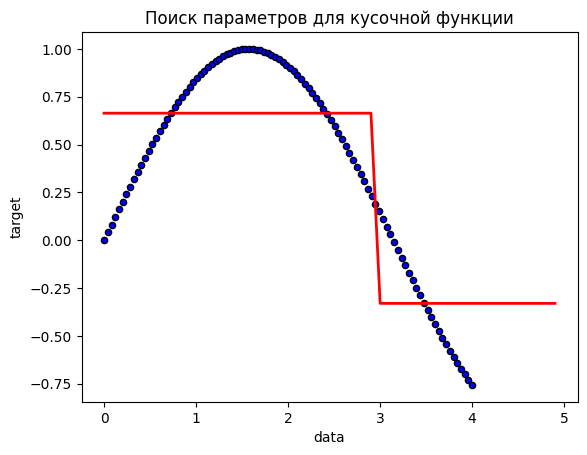

In [38]:
solve_task(*num_points(100))